Instale o Pillow para iterar sob os pixels da imagem

In [1]:
import sys
!{sys.executable} -m pip install pillow

Importar a imagem

Tamanho: 484x645


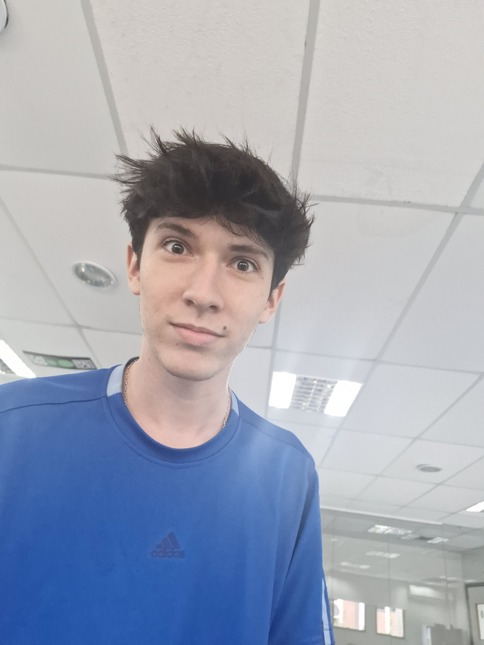

In [37]:
from PIL import Image
from IPython.display import display

# Abrir a imagem
imagem = Image.open("sample/gustavo.png")
img_x, img_y = imagem.size
print(f"Tamanho: {img_x}x{img_y}")

display(imagem)


Criando os kernels:

In [38]:
kernel_x = ((1, 0, -1),
            (2, 0, -2),
            (1, 0, -1))

kernel_y = ((1, 2, 1),
            (0, 0, 0),
            (-1, -2, -1))

Deixando a imagem em grayscale (preto e branco)

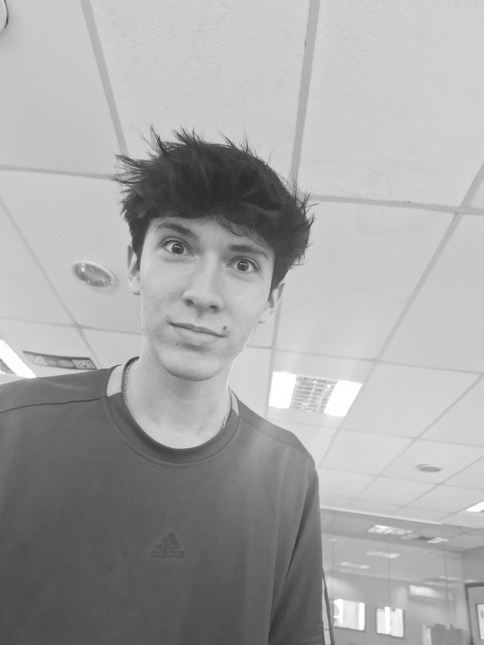

In [39]:

def greyscale(imagem_fonte: Image) -> Image:
    imagem_fonte = imagem_fonte.convert("RGB")

    largura, altura = imagem_fonte.size

    for y in range(altura):
        for x in range(largura):
            r, g, b = imagem_fonte.getpixel((x, y))

            gray = int(0.299*r + 0.587*g + 0.114*b)

            imagem_fonte.putpixel((x, y), (gray, gray, gray))

    return imagem_fonte

imagem = greyscale(imagem)
display(imagem)

Iterando pela imagem (convolução) para gerar os gradientes horizontais e verticais

Gradiente X


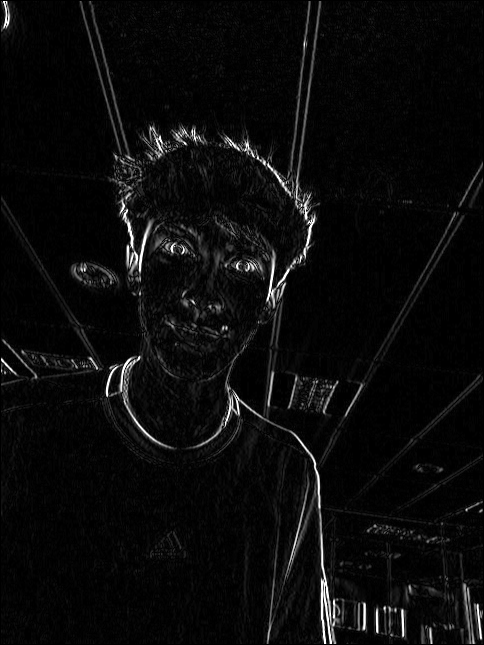

Gradiente Y


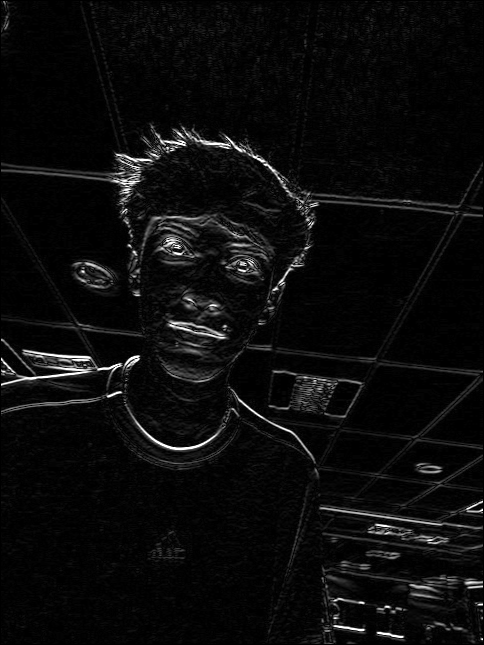

In [40]:
def convolucao(imagem_fonte: Image, kernel: tuple) -> Image:
    largura, altura = imagem_fonte.size
    imagem_saida = Image.new("RGB", (largura, altura))
    
    offset = 1 # O centro de um kernel 3x3 é o índice 1

    # Ignoramos as bordas para simplificar (range começa em 1)
    for x in range(offset, largura - offset):
        for y in range(offset, altura - offset):
            
            acc_r, acc_g, acc_b = 0, 0, 0

            for i in range(3): 
                for j in range(3):
                    
                    peso = kernel[i][j] 
                    
                    pos_x_vizinho = x + (j - offset)
                    pos_y_vizinho = y + (i - offset)
                    
                    r, g, b = imagem_fonte.getpixel((pos_x_vizinho, pos_y_vizinho))
                    
                    acc_r += r * peso
                    acc_g += g * peso
                    acc_b += b * peso


            # Use o valor absoluto do gradiente e clampe em [0,255]
            novo_pixel = (
                int(max(0, min(255, abs(acc_r)))),
                int(max(0, min(255, abs(acc_g)))),
                int(max(0, min(255, abs(acc_b))))
            )
            imagem_saida.putpixel((x, y), novo_pixel)
            
    return imagem_saida

gradiente_x = convolucao(imagem, kernel_x)
gradiente_y = convolucao(imagem, kernel_y)

print("Gradiente X")
display(gradiente_x)

print("Gradiente Y")
display(gradiente_y)

Finalmente, gerando a magnetude com a formula $M = \sqrt{{G_x}^2 + {G_y}^2}$

Imagem Final


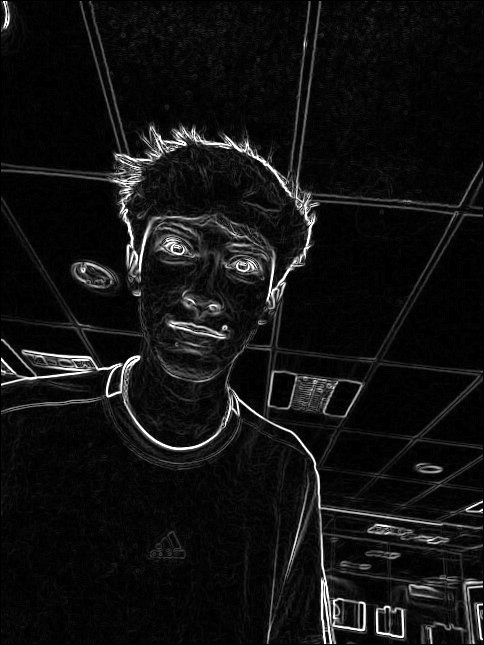

In [41]:
import math

def magnetude(grad_x: Image, grad_y: Image) -> Image:
    largura, altura = grad_x.size

    imagem_saida = Image.new("RGB", (largura, altura))

    formula = lambda gxx, gyy: int(min(255, math.sqrt((gxx**2) + (gyy**2))))
    
    for y in range(altura):
        for x in range(largura):
            gx = grad_x.getpixel((x, y))
            gy = grad_y.getpixel((x, y))
            pixel = (formula(gx[0], gy[0]),
                     formula(gx[1], gy[1]),
                     formula(gx[2], gy[2]))

            imagem_saida.putpixel((x, y), pixel)
    
    return imagem_saida

print("Imagem Final")
display(magnetude(gradiente_x, gradiente_y))